<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/text_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text file processing in Python

There are two main groups of files stored on a computer: text files and binary files. Text files are human readable, usually edited by notepad, notepad++, etc. (e.g. .txt, .csv, .html, .xml). These files consist of lines that are separated by the end of line marker (EOL). On the other hand, binary files are created/read by special programs (for example .jpg, .exe, .las, .doc, .xls).
Text files consist of lines, lines are separated by end of line markers (EOL).

Operating system | EOL marker
-----------------|------------
Windows          | \r\n 
Linux/Unix       | \n 
OS X             | \r 

##Type of text files

Have you ever seen such files shown in the following formats?

---
CSV file with header line, comma separated, fixed or variable record structure, header is optional
```
Psz,X,Y,Z,
11,91515.440,2815.220,111.920
12,90661.580,1475.280,
13,84862.540,3865.360,
14,91164.160,4415.080,130.000
15,86808.180,347.660,
16,90050.240,3525.120,
231,88568.240,2281.760,
232,88619.860,3159.880,
5001,,,100.000
5002,,,138.800
...
```

---
Stanford Triangle Format (Polygon File Format) for point clouds and meshes, several header lines, space separated records with fixed structure
```
ply
format ascii 1.0
element vertex 1978561
property float x
property float y
property float z
property float nx
property float ny
property float nz
property uchar diffuse_red
property uchar diffuse_green
property uchar diffuse_blue
end_header
0.445606 -10.6263 16.0626 -0.109425 -0.0562636 -0.992401 63 68 83
0.460964 -10.6142 16.0604 -0.255715 -0.00303709 -0.966747 43 52 72
0.434582 -10.4337 16.0433 -0.252035 0.171206 -0.952453 32 36 44
0.449782 -10.3186 16.0506 -0.175198 -0.0186472 -0.984357 40 42 53
...
```
---
ESRI ASCII GRID format, six header lines, space separated, fixed record structure
```
ncols 9
nrows 11
xllcorner 576540
yllcorner 188820
cellsize 30
nodata_value -9999
-9999 -9999 139.37 139.81 140.77 141.97 143.32 144.16 -9999
-9999 137.29 137.61 138.00 138.93 140.02 141.40 141.60 140.81
-9999 135.78 135.69 135.89 137.04 138.25 139.44 139.76 139.19
133.94 134.15 133.98 134.03 135.28 136.79 137.69 137.92 137.87
132.76 132.77 132.99 132.58 133.76 135.16 135.73 135.77 135.80
131.76 131.53 131.64 130.81 132.26 133.44 133.85 133.93 -9999
-9999 -9999 130.75 130.15 130.52 132.00 132.46 -9999 -9999
...
```

---
Leica GSI file, fixed field width, space separated, variable record length

```
*110001+0000000000002014 81..10+0000000000663190 82..10+0000000000288540 83..10-0000000000001377
*110002+0000000000002015 81..10+0000000000649270 82..10+0000000000319760 83..10-0000000000000995
*110003+0000000000002019 81..10+0000000000593840 82..10+0000000000253050 83..10-0000000000001486
*110004+0000000000002020 81..10+0000000000562890 82..10+0000000000274730 83..10-0000000000001309
*110005+00000000000000AE 81..10+0000000000664645 82..10+0000000000245619 83..10+0000000000001505
*110006+00000000000000EL 81..10+0000000000714787 82..10+0000000000300190 83..10+0000000000002396
*110007+00000000000000HK 81..10+0000000000633941 82..10+0000000000269764 83..10+0000000000000362
...
```

---
GeoJSON file, free format, label - value pairs, vectors, hierarchical structure
```
{ "type": "FeatureCollection",
  "features": [
    { "type": "Feature",
      "geometry": {"type": "Point", "coordinates": [102.0, 0.5]},
      "properties": {"prop0": "value0"}
    },
    { "type": "Feature",
      "geometry": {
      "type": "LineString",
      "coordinates": [
      [102.0, 0.0], [103.0, 1.0], [104.0, 0.0], [105.0, 1.0]
  ]
},
...
```

---
GML (XML), free format, hierarchical structure, tags, international standard
```
<?xml version="1.0" encoding="utf-8" ?>
<ogr:FeatureCollection
     xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
     xsi:schemaLocation="http://ogr.maptools.org/ xxx.xsd"
     xmlns:ogr="http://ogr.maptools.org/"
     xmlns:gml="http://www.opengis.net/gml">
  <gml:boundedBy>
    <gml:Box>
      <gml:coord><gml:X>632897.91</gml:X><gml:Y>134104.66</gml:Y></gml:coord>
      <gml:coord><gml:X>636129.8</gml:X><gml:Y>138914.58</gml:Y></gml:coord>
    </gml:Box>
  </gml:boundedBy>
  <gml:featureMember>
    <ogr:xxx fid="xxx.0">
      <ogr:geometryProperty><gml:Point srsName="EPSG:23700"><gml:coordinates>635474.17,137527.75</gml:coordinates></gml:Point></ogr:geometryProperty>
...
```

##Processing patterns

In automated processing of text files, command line interface and command line parameters are used. There is no need for GUI (Graphical User Interface), once there will be no user to communicate with it.

**Redirection of standard input and output**

```
 -------        ------------        --------
| input |      | processing |      | output |
| file  | ---> | script/prg | ---> | file   |
 -------        ------------        --------
 ```
 command input_file(s) > output_file
 
 command < input_file > output file

**Redirection and pipes**

 ```
 -------        ------------        ------------            --------
| input |      | processing |      | processing |          | output |
| file  | ---> | 1st step   | ---> | 2nd step   | ---> ... | file   |
 -------        ------------        ------------            --------
 ```
 command1 input_file(s) | command2 > output_file

 command1 < input file  | command2 > output_file

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/images/file_proc.png?raw=true")

##Sample programs

Before working on the following programming examples, it is necessary to upload some text files to Colab. For that, select the folder icon on the left side of Colab. Then, move the cursor on the sample data folder in the opening *File* panel. After that, click on the three dots and select *Upload*. Lastly, upload a text file with easting, northin, elevation data or use the code block provided below to copy the file from Google Drive to the sample_data folder of Colab.

In [ ]:
!gdown --id 18SkltcBaEiMMKA3siyVUKdOWl8FhSB-m -O sample_data/gcp.txt

Downloading...
From: https://drive.google.com/uc?id=18SkltcBaEiMMKA3siyVUKdOWl8FhSB-m
To: /content/sample_data/gcp.txt
100% 241/241 [00:00<00:00, 468kB/s]


Example to add ordinal number to rows in a file

In [ ]:
i = 1
with open('sample_data/gcp.txt') as fp:
  for line in fp:
    print(i, line)
    i += 1

1 133.101 140.589 83.295

2 119.427 121.613 98.070

3 104.153 141.505 105.158

4 105.286 131.409 90.394

5 109.961 147.038 86.747

6 98.155 121.064 108.372

7 112.310 134.787 70.718

8 114.882 121.867 86.678

9 118.986 143.970 89.747

10 121.269 141.009 91.106



Is the result satisfactory? Note that there are empty lines between the data rows. This happens because the line read from the file has an EOL character and the print command add another EOL to the line. Thereby, we can force the print command to not add the additional EOL.

In [ ]:
i = 1
with open('sample_data/gcp.txt') as fp:
	for line in fp:
		print(i, line.strip('\n\r'))  # print(i, line, end='') would also be fine
		i += 1

1 133.101 140.589 83.295
2 119.427 121.613 98.070
3 104.153 141.505 105.158
4 105.286 131.409 90.394
5 109.961 147.038 86.747
6 98.155 121.064 108.372
7 112.310 134.787 70.718
8 114.882 121.867 86.678
9 118.986 143.970 89.747
10 121.269 141.009 91.106


Let's create a new file with the row numbers.

In [ ]:
i = 1
with open('sample_data/gcp.txt') as fp:
  with open('sample_data/gcp1.txt', 'w') as fo:
    for line in fp:
      print(i, line, end='', file=fo)
      i += 1

We can check if the new file exists.

In [ ]:
!ls sample_data

anscombe.json		      gcp1.txt	      mnist_train_small.csv
california_housing_test.csv   gcp.txt	      README.md
california_housing_train.csv  mnist_test.csv


In [ ]:
!more sample_data/gcp1.txt

1 133.101 140.589 83.295
2 119.427 121.613 98.070
3 104.153 141.505 105.158
4 105.286 131.409 90.394
5 109.961 147.038 86.747
6 98.155 121.064 108.372
7 112.310 134.787 70.718
8 114.882 121.867 86.678
9 118.986 143.970 89.747
10 121.269 141.009 91.106


Let's find the bounding box from the coordinates stored in the file. Fields are separated by space. For that, we will use [**pandas**](https://pandas.pydata.org).

In [ ]:
import pandas as pd
names = ['id', 'east', 'north', 'elev']
data = pd.read_csv('sample_data/gcp1.txt', sep=' ', names=names)
mi = data.min()
ma = data.max()
print(mi['east'], ma['east'], mi['north'], ma['north'], mi['elev'], ma['elev'])

98.155 133.101 121.064 147.03799999999998 70.718 108.37200000000001


To avoid unneccesary decimals, let's use **f-string** to format output.

In [ ]:
print(f"{mi['east']:.2f} {ma['east']:.2f} {mi['north']:.2f} {ma['north']:.2f} {mi['elev']:.2f} {ma['elev']:.2f}")

98.16 133.10 121.06 147.04 70.72 108.37


Pandas handles data set of records, each having an index number. Some examples to access data in a data set are provided on the code blocks below:

In [ ]:
data.iloc[[0]]  # get first row

,east,north,elev
0,548025.89,5129282.5,1008.79


In [ ]:
data["east"]    # get a column

0        548025.89
1        548026.41
2        548026.81
3        548027.89
4        548029.48
           ...    
51145    548780.38
51146    548777.73
51147    548767.47
51148    548766.65
51149    548758.24
Name: east, Length: 51150, dtype: float64

In [ ]:
data["north"][2]  # get a field

5129270.56

Adding new column to the data set, the distance from the origin and some statistical data.

In [ ]:
data["dist"] = (data['east'] ** 2 + data["north"] ** 2 + data["elev"] ** 2) ** 0.5
data["dist"].describe()

count     10.000000
mean     198.824504
std        8.680056
min      188.580262
25%      190.150904
50%      199.857800
75%      206.516147
max      210.758630
Name: dist, dtype: float64

Pandas has some plotting capabilities as well. The picture below illustrates a 2D view of the point cloud.

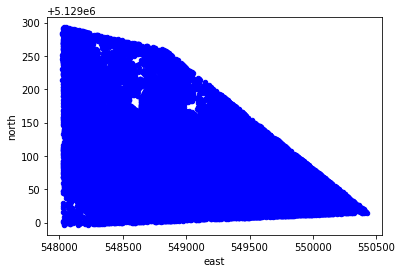

In [ ]:
data.plot.scatter(x='east', y='north', c='blue')

Let's create a text file from the Pandas data set which contains only the east and the north coordinates.

In [ ]:
data.to_csv('sample_data/xy.csv', columns=['east', 'north'], index=False)

**Note**

*Pandas can read/write data from/to relational databases too (SQLite, PostgreSQL, etc.).*

##Parse Nikon recorded observations

Nikon total stations save observations into variable length and variable structure delimited text file. Pandas is not a solution for this situation.

Sample from the file:

```
CO,HA Raw data: Azimuth
CO,Tilt Correction:  VA:OFF HA:OFF
CO, TOPO <JOB> Created 01-Jan-2001 05:00:27
MP,OMZ1,,4950153.530,5173524.258,341.532,
MP,OMZ2,,4950392.611,5173092.830,306.781,
CO,Temp:30C Press:740mmHg Prism:0 01-Jan-2001 05:39:35
ST,OMZ1,,OMZ2,,0.000,298.5937,298.5937
F1,OMZ2,0.000,494.429,0.0000,94.0142,05:39:35
SS,1,0.000,111.109,268.2305,101.4007,05:46:01,
```

The first two characters in each line mark the type of the record.
We'll write a program that changes the Nikon raw format into a human readable table. Furthermore, we'll divide our program into two parts. First, the whole data file will be processed and the data will be stored in a list of dictionaries structure. Then, in the second part, we'll write out data. The second part can be replaced for processed data to calculate coordinates, for example.

In [ ]:
!gdown --id 1AxSK6qqLITEpYV0u0Fr9w4avEqfIF7MN -O sample_data/nikon.raw

Downloading...
From: https://drive.google.com/uc?id=1AxSK6qqLITEpYV0u0Fr9w4avEqfIF7MN
To: /content/sample_data/nikon.raw
100% 1.55k/1.55k [00:00<00:00, 2.33MB/s]


First, we will make auxiliary functions. Mean directions and zenith angles are in DMS format as a pseudo decimal number (e.g. DDD.MMSS). Based on that, we'll write a function to change the DDD.MMSS values to radians, and another function to convert radian to DDD-MM-SS format.

In [ ]:
from math import pi
def to_rad(pseudo_dms):
  """ convert pseudo DMS string (DDD.MMSS) to radians """
  w = pseudo_dms.split('.')
  degree = int(w[0])
  minute = int(w[1][:2])
  second = int(w[1][2:])
  return (degree + minute / 60 + second / 3600) / 180 * pi

to_rad('180.0000')      # to test the function

3.141592653589793

In [ ]:
ro = 180 / pi * 3600
def to_dms(angle):
  """ convert angle from radian to DMS string """
  s = int(angle * ro)
  degree, s = divmod(s, 3600)
  minute, s = divmod(s, 60)
  return f'{degree:d}-{int(minute):02d}-{int(s):02d}'

to_dms(pi)


'180-00-00'

We won't process all record types from the file, only ST, F1 and SS record will be considered. Given this, the next part of the code parses the input file.

In [ ]:
field_book = []                                   # list to store field-book data
with open('sample_data/nikon.raw') as f:
  for line in f:                                  # process file line by line
    rec_list = line.strip('\n\r').split(',')      # remove EOL marker(s) and slip by comma
    rec_dict = {}                                 # empty dictionary for needed data
    if rec_list[0] == 'ST':                    # station record
      rec_dict['station'] = rec_list[0]           # station id
      rec_dict['ih'] = float(rec_list[5])         # instrument height
      field_book.append(rec_dict)
    if rec_list[0] in ('F1', 'SS'):             # observation in face left
      rec_dict['target'] = rec_list[1]            # target id
      rec_dict['th'] = float(rec_list[2])         # target height
      rec_dict['sd'] = float(rec_list[3])         # slope distance
      rec_dict['ha'] = to_rad(rec_list[4])        # mean direction
      rec_dict['za'] = to_rad(rec_list[5])        # zenith angle
      if len(rec_list) > 7 and len(rec_list[7]) > 0:
        rec_dict['cd'] = rec_list[7]              # point code
      else:
        rec_dict['cd'] = ''
      field_book.append(rec_dict)

field_book    # for test

[{'ih': 0.0, 'station': 'ST'},
 {'cd': '',
  'ha': 0.0,
  'sd': 494.429,
  'target': 'OMZ2',
  'th': 0.0,
  'za': 1.6411040068294016},
 {'cd': '',
  'ha': 4.68419706482817,
  'sd': 111.109,
  'target': '1',
  'th': 0.0,
  'za': 1.7744520098185794},
 {'cd': '',
  'ha': 4.7684043531000855,
  'sd': 101.705,
  'target': '2',
  'th': 0.0,
  'za': 1.7962977142893752},
 {'cd': '',
  'ha': 4.91997165422536,
  'sd': 95.515,
  'target': '3',
  'th': 0.0,
  'za': 1.8177070864471723},
 {'cd': '',
  'ha': 5.103017907665077,
  'sd': 93.937,
  'target': '4',
  'th': 0.0,
  'za': 1.826685835821321},
 {'cd': '',
  'ha': 5.2871452956136675,
  'sd': 96.842,
  'target': '5',
  'th': 0.0,
  'za': 1.8169701696518856},
 {'cd': '',
  'ha': 5.450857179450735,
  'sd': 102.858,
  'target': '6',
  'th': 0.0,
  'za': 1.796564361813985},
 {'cd': '',
  'ha': 5.579046764872906,
  'sd': 110.445,
  'target': '7',
  'th': 0.0,
  'za': 1.7644551517141005},
 {'cd': '',
  'ha': 5.680654016159844,
  'sd': 119.799,
  'target

The next and last part will print the field-book in human readable form.

In [ ]:
header1 = '----------------------------------------------------------'
header2 = '| station| target |  HA     |  VA     |    SD   |  Code  |'
print(header1); print(header2); print(header1)
for rec in field_book:
  if 'station' in rec:
    print(f"|{rec['station']:8s}|        |         |         |         |        |")
  elif 'target' in rec:
    print(f"|        |{rec['target']:8s}|{to_dms(rec['ha']):>9s}|{to_dms(rec['za']):>9s}|{rec['sd']:9.3f}|{rec['cd']:8s}|")
print(header1)



----------------------------------------------------------
| station| target |  HA     |  VA     |    SD   |  Code  |
----------------------------------------------------------
|ST      |        |         |         |         |        |
|        |OMZ2    |  0-00-00| 94-01-42|  494.429|        |
|        |1       |268-23-04|101-40-07|  111.109|        |
|        |2       |273-12-34|102-55-13|  101.705|        |
|        |3       |281-53-37|104-08-49|   95.515|        |
|        |4       |292-22-53|104-39-41|   93.937|        |
|        |5       |302-55-52|104-06-17|   96.842|        |
|        |6       |312-18-40|102-56-07|  102.858|        |
|        |7       |319-39-20|101-05-44|  110.445|        |
|        |8       |325-28-39| 99-12-00|  119.799|        |
|        |9       |327-54-22| 97-57-26|  126.586|        |
|        |10      |330-27-02| 96-42-07|  134.142|        |
|        |11      |332-24-44| 95-25-54|  142.076|        |
|        |12      |333-37-26| 94-07-54|  150.195|       

##Complex example for self-study

Finally let's try a more complex example. The following program can be downloaded from the Internet, as follows (it is also available on [GitHub](https://github.com/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/code/filt.py)):

In [ ]:
!gdown --id 1Le7CO2-klyJMmlrT7inMWaaLggEqz2DT

Downloading...
From: https://drive.google.com/uc?id=1Le7CO2-klyJMmlrT7inMWaaLggEqz2DT
To: /content/filt.py
100% 3.08k/3.08k [00:00<00:00, 4.87MB/s]


This program gets parameters from the command line, so it can be used in automation processes.

In [ ]:
!cat filt.py

#!/usr/bin/env python
# -*- coding: utf-8 -*-
""" filter ascii point cloud save every nth line optionally with row number
    output is sent to standard output use > to save it to file
    usage: python filter_n.py <switches> [input1 input2 input3]
        switches:
            -i or --input_separator separator in input file, default ","
            -o or --output_separator separator in output file, default ","
            -r or --rows keep only every rth rows, default 10
            -d or --decimals write d decimals to output, default 3
            -n or --nums add row numbers to output
        input - name of ascii point cloud or standard input if none given
"""
import sys          # for sys.stdin
import argparse     # for command line parameters processing

def pc_filter(row_num, r_skip, n_dec, i_sep, o_sep, i_fp):
    """ filter an ascii point cloud
        row_num (boolean) - add row numbers if true
        r_skip (int) - only every rth row is written to the output
        n_dec (

The next command shows how to get help about the program. On your own machine, do not use the "!" given that it is a Colab feature. You may use *python3* instead of *python*.

In [ ]:
! python filt.py -h

usage: filt.py [-h] [-i INPUT_SEPARATOR] [-o OUTPUT_SEPARATOR] [-r ROWS]
               [-d DECIMALS] [-n]
               [file_names [file_names ...]]

positional arguments:
  file_names            files to process

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT_SEPARATOR, --input_separator INPUT_SEPARATOR
                        input separator, default ","
  -o OUTPUT_SEPARATOR, --output_separator OUTPUT_SEPARATOR
                        output separator, default ","
  -r ROWS, --rows ROWS  rows to keep, default 10
  -d DECIMALS, --decimals DECIMALS
                        number of decimals in output co-ordinates, default 3
  -n, --nums            add row numbers to output, default off


The next command shows how to use the program on the gcp.txt file previously downloaded (First example of Sample Programs). The code block below can be reas as follows: Input separator is space, keep every second rows, use two decimals and add row numbers to output.

In [ ]:
!python filt.py -i " " -r 2 -d 2 -n sample_data/gcp.txt

1,119.43,121.61,98.07
2,105.29,131.41,90.39
3,98.16,121.06,108.37
4,114.88,121.87,86.68
5,121.27,141.01,91.11


##Tasks

*   Try to read a text file with header row(s) and different separators using pandas
*   Extend the functionality of the Nikon RAW format reader, parse MP records and calculate coordinates from observations in SS records
*   Download *filt.py* and try to use it from the command line on your machine
*   Try to read/write data from/to an SQLite database into a pandas data frame.

